## BIRTH Dataset

In [3]:
!pip install pandas matplotlib seaborn

  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.3.4-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset=pd.read_csv("births.csv")

In [6]:
dataset.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [28]:
dataset.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


##### A pivot table is a data summarization tool that lets you reorganize and aggregate your data to see patterns easily.

#### Pivot table = group rows by year, split columns by gender, sum the births.

In [7]:
yearly_births = dataset.pivot_table(
    index='year',
    columns='gender',
    values='births',
    aggfunc='sum'
).reset_index()

print(yearly_births)

gender  year        F        M
0       1969  1753634  1846572
1       1970  1819164  1918636
2       1971  1736774  1826774
3       1972  1592347  1673888
4       1973  1533102  1613023
5       1974  1543005  1627626
6       1975  1535546  1618010
7       1976  1547613  1628863
8       1977  1623363  1708796
9       1978  1626324  1711976
10      1979  1705837  1793958
11      1980  1762459  1855522
12      1981  1772037  1863478
13      1982  1797239  1888218
14      1983  1775299  1867522
15      1984  1791802  1881766
16      1985  1834774  1930290
17      1986  1833708  1926987
18      1987  1860111  1953105
19      1988  1909210  2004583
20      1989  1973712  2071981
21      1990  2030966  2131951
22      1991  2011601  2103741
23      1992  1985118  2084310
24      1993  1953456  2051067
25      1994  1932234  2024691
26      1995  1904871  1998141
27      1996  1902664  1992210
28      1997  1896928  1987401
29      1998  1927106  2018086
30      1999  1934510  2028955
31      

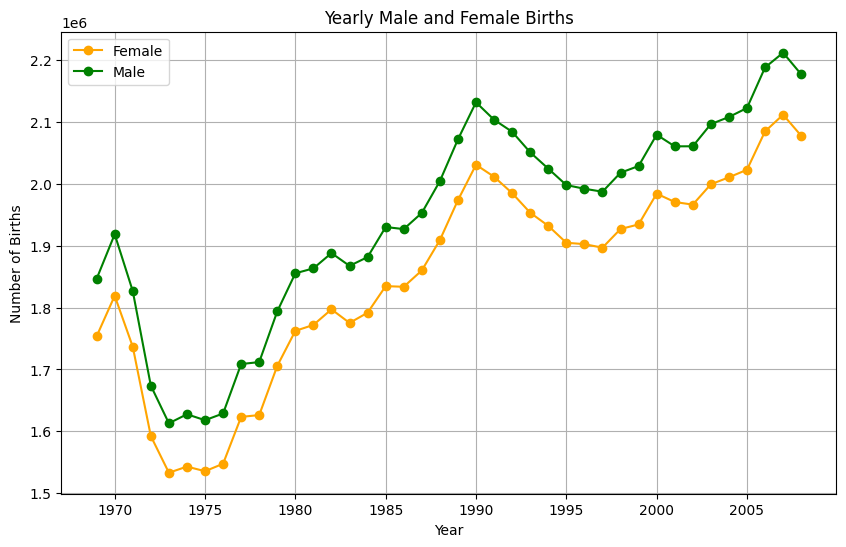

In [8]:
plt.figure(figsize=(10, 6))

# Plot Female births
plt.plot(yearly_births['year'], yearly_births['F'], marker='o', label='Female', color='orange')

# Plot Male births
plt.plot(yearly_births['year'], yearly_births['M'], marker='o', label='Male', color='green')

# Labels & title
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Yearly Male and Female Births')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Map day numbers to names
day_map = {1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday",
           5: "Friday", 6: "Saturday", 7: "Sunday"}
dataset['weekday'] = dataset['day'].map(day_map)

In [14]:
dataset.head()

,year,month,day,gender,births,weekday
0,1969,1,1.0,F,4046,Monday
1,1969,1,1.0,M,4440,Monday
2,1969,1,2.0,F,4454,Tuesday
3,1969,1,2.0,M,4548,Tuesday
4,1969,1,3.0,F,4548,Wednesday


In [16]:
weekday_births = dataset.pivot_table(
    index='weekday',
    columns='gender',
    values='births',
    aggfunc='sum'
)

# Reorder weekdays correctly
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_births = weekday_births.reindex(weekday_order)
print(weekday_births)


gender           F        M
weekday                    
Monday     1116209  1170645
Tuesday    1121757  1181411
Wednesday  1124014  1185073
Thursday   1115250  1171338
Friday     1121260  1175691
Saturday   1124184  1183889
Sunday     1126814  1187267


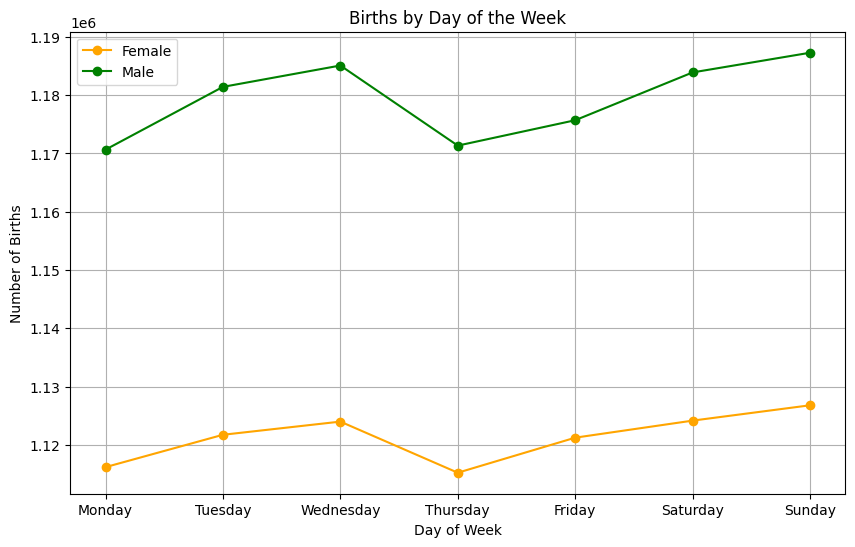

In [17]:
plt.figure(figsize=(10,6))
plt.plot(weekday_births.index, weekday_births['F'], marker='o', color='orange', label='Female')
plt.plot(weekday_births.index, weekday_births['M'], marker='o', color='green', label='Male')
plt.xlabel('Day of Week')
plt.ylabel('Number of Births')
plt.title('Births by Day of the Week')
plt.legend()
plt.grid(True)
plt.show()


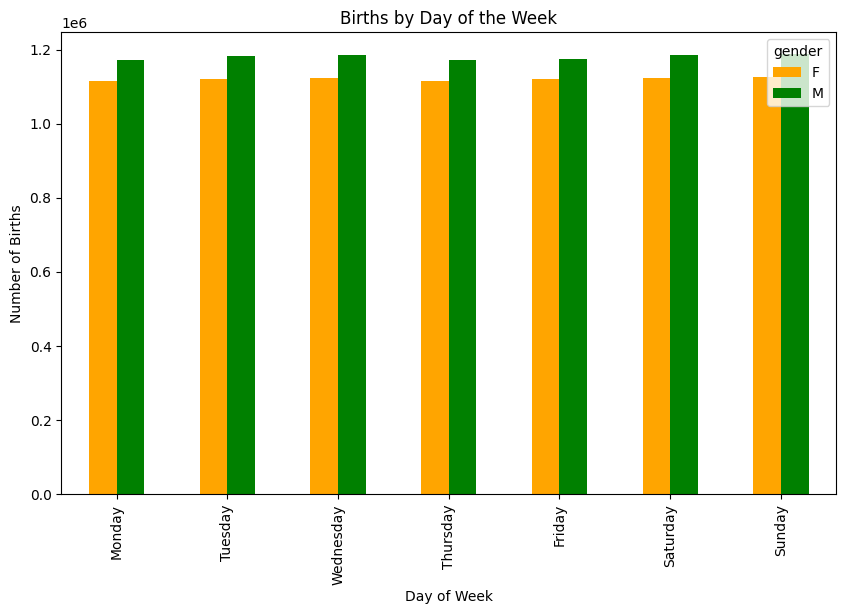

In [18]:
weekday_births.plot(kind='bar', figsize=(10,6), color=['orange','green'])
plt.xlabel('Day of Week')
plt.ylabel('Number of Births')
plt.title('Births by Day of the Week')
plt.show()


In [21]:
# Map day numbers to names
day_map = {1: "January", 2: "February", 3: "March", 4: "April",
           5: "May", 6: "June", 7: "July", 8: "August",
           9: "September", 10: "October", 11: "November", 12: "December"}
dataset['month_name'] = dataset['month'].map(day_map)

In [22]:
dataset.head()

,year,month,day,gender,births,weekday,month_name
0,1969,1,1.0,F,4046,Monday,January
1,1969,1,1.0,M,4440,Monday,January
2,1969,1,2.0,F,4454,Tuesday,January
3,1969,1,2.0,M,4548,Tuesday,January
4,1969,1,3.0,F,4548,Wednesday,January


In [23]:
# Assuming your dataset is called df
month_births = dataset.pivot_table(
    index='month_name',      # group by month
    columns='gender',   # separate columns for F and M
    values='births',
    aggfunc='sum'
).reset_index()


# Reorder weekdays correctly
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_births = month_births.set_index('month_name').reindex(month_order).reset_index()
print(month_births)

gender month_name        F        M
0         January  6035447  6328750
1        February  5634064  5907114
2           March  6181613  6497231
3           April  5889345  6196546
4             May  6145186  6479786
5            June  6093026  6428044
6            July  6512299  6855257
7          August  6600723  6927284
8       September  6473029  6779802
9         October  6330549  6624401
10       November  5956388  6241579
11       December  6184154  6472761


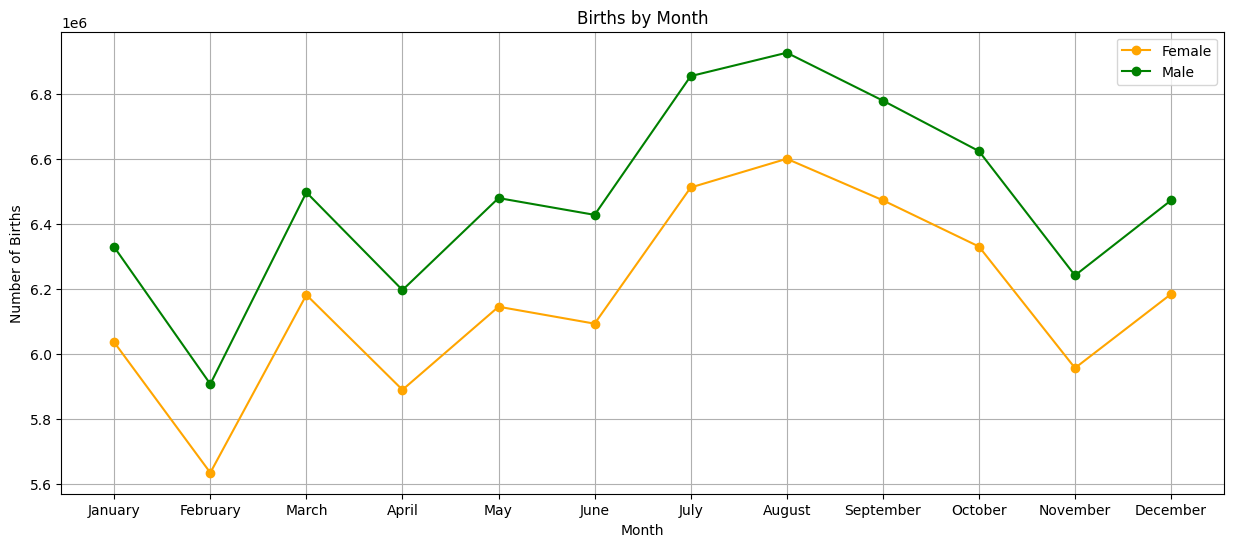

In [26]:
plt.figure(figsize=(15,6))
plt.plot(month_births['month_name'], month_births['F'], marker='o', color='orange', label='Female')
plt.plot(month_births['month_name'], month_births['M'], marker='o', color='green', label='Male')
plt.xlabel('Month')
plt.ylabel('Number of Births')
plt.title('Births by Month')
plt.legend()
plt.grid(True)
plt.show()


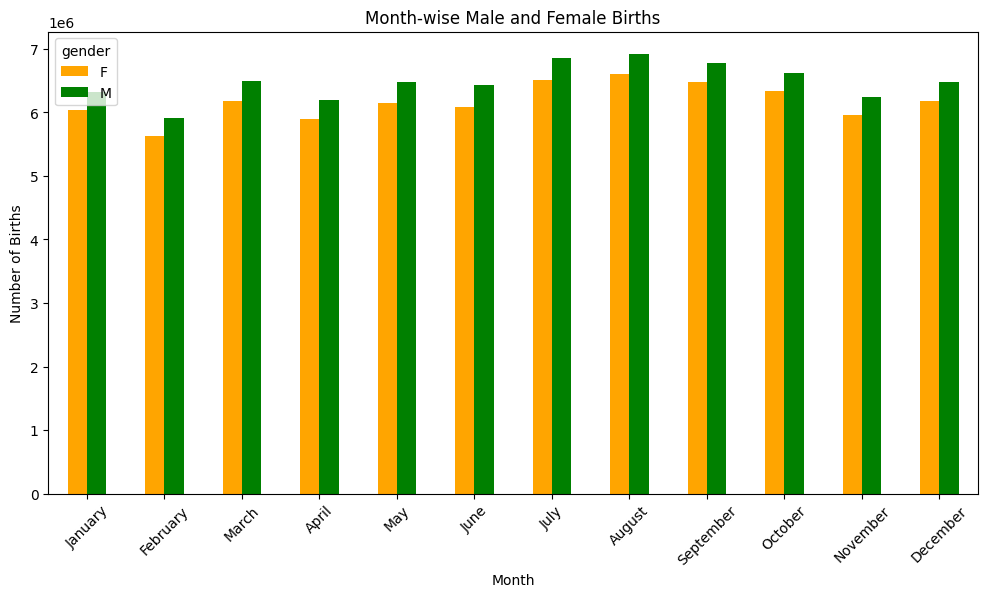

In [27]:
month_births.set_index('month_name')[['F','M']].plot(
    kind='bar',
    figsize=(12,6),
    color=['orange','green']
)

plt.xlabel('Month')
plt.ylabel('Number of Births')
plt.title('Month-wise Male and Female Births')
plt.xticks(rotation=45)
plt.show()


### Executive Summary

The dataset contains 15,547 records with the columns: year, month, day, gender, and births.

After performing analysis and visualizations:

The year with the highest number of births for both males and females is 2006.

The most common day of the week for births is Wednesday.

The month with the highest number of births is August.